## Initial Setup

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import itertools
import os
import math
import string
import re
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import helper
import pickle

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D,Conv1D,MaxPooling1D

layers = keras.layers

Using TensorFlow backend.


## Training Parameters

We'll set the hyperparameters for training our model. If you understand what they mean, feel free to play around - otherwise, we recommend keeping the defaults for your first run 🙂

In [2]:
# Hyperparams if GPU is available
if tf.test.is_gpu_available():
    print('---- We are using GPU now ----')
    # GPU
    BATCH_SIZE = 512  # Number of examples used in each iteration
    EPOCHS = 800  # Number of passes through entire dataset
    
# Hyperparams for CPU training
else:
    print('---- We are using CPU now ----')
    # CPU
    BATCH_SIZE = 256
    EPOCHS = 40

---- We are using GPU now ----


## Data

The wine reviews dataset is already attached to your workspace (if you want to attach your own data, [check out our docs](https://docs.floydhub.com/guides/workspace/#attaching-floydhub-datasets)).

Let's take a look at data.

In [3]:
data_path = '/floyd/input/gengduoshuju/'  # ADD path/to/dataset
Y= pickle.load( open(os.path.join(data_path,'Y.pks'), "rb" ) )
X= pickle.load( open(os.path.join(data_path,'X.pks'), "rb" ) )
X = X.reshape((X.shape[0],X.shape[1],1))
print("Size of X :" + str(X.shape))
print("Size of Y :" + str(Y.shape))
X = X.astype(np.float64)
X = np.nan_to_num(X)

Size of X :(412038, 240, 1)
Size of Y :(412038,)


## Data Preprocessing

In [4]:
X_train,  X_test, Y_train_orig,Y_test_orig= helper.divide_data(X,Y)
print(Y.min())
print(Y.max())
num_classes = 332
Y_train = keras.utils.to_categorical(Y_train_orig, num_classes)
Y_test = keras.utils.to_categorical(Y_test_orig, num_classes)
print("number of training examples = " + str(X_train.shape[0]))
print("number of test examples = " + str(X_test.shape[0]))
print("X_train shape: " + str(X_train.shape))
print("Y_train shape: " + str(Y_train.shape))
print("X_test shape: " + str(X_test.shape))
print("Y_test shape: " + str(Y_test.shape))

0.0
331.0
number of training examples = 403797
number of test examples = 8241
X_train shape: (403797, 240, 1)
Y_train shape: (403797, 332)
X_test shape: (8241, 240, 1)
Y_test shape: (8241, 332)


In [5]:
input_shape = X_train.shape[1:]
print(input_shape)

(240, 1)


# Model definition

The *Tokens per sentence* plot (see above) is useful for setting the `MAX_LEN` training hyperparameter.

In [6]:
# ===================================================================================
# Model definition part
# ===================================================================================

model = Sequential()
model.add(Conv1D(16, 4,padding='same',input_shape=X_train.shape[1:]))
print(model.output_shape)
model.add(Activation('relu'))
print(model.output_shape)
model.add(MaxPooling1D(2,padding='same'))
print(model.output_shape)
model.add(Conv1D(32, 4,padding='same'))
print(model.output_shape)
model.add(Activation('relu'))
model.add(MaxPooling1D(2,padding='same'))
print(model.output_shape)
model.add(Conv1D(64, 4,padding='same'))
print(model.output_shape)
model.add(Activation('relu'))
model.add(MaxPooling1D(2,padding='same'))
model.add(Conv1D(64, 4,padding='same'))
print(model.output_shape)
model.add(Activation('relu'))
model.add(MaxPooling1D(2,padding='same'))
model.add(Conv1D(32, 4,padding='same'))
print(model.output_shape)
model.add(Activation('relu'))
model.add(MaxPooling1D(2,padding='same'))
print(model.output_shape)
model.add(Flatten())
model.add(Dense(num_classes))
model.add(Activation('softmax'))

(None, 240, 16)
(None, 240, 16)
(None, 120, 16)
(None, 120, 32)
(None, 60, 32)
(None, 60, 64)
(None, 30, 64)
(None, 15, 32)
(None, 8, 32)


# Model Training

In [ ]:
opt = keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.summary()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

history_try = model.fit(X_train, Y_train,
              batch_size=BATCH_SIZE,
              epochs=EPOCHS,
              validation_data=(X_test, Y_test),
              shuffle=True)

model.save(r"floyd_model_xxl_data_v.h5")
print('Training is done!')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 240, 16)           80        
_________________________________________________________________
activation_1 (Activation)    (None, 240, 16)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 120, 16)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 120, 32)           2080      
_________________________________________________________________
activation_2 (Activation)    (None, 120, 32)           0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 60, 32)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 60, 64)            8256      
__________

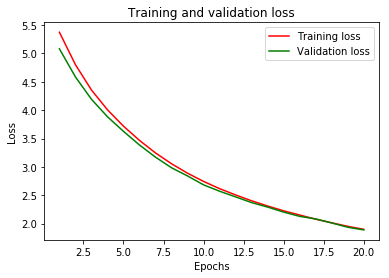

In [17]:
# Plot training & validation accuracy values
loss = history_try.history['loss']
val_loss = history_try.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
with open('training_hist.pks','wb') as f:
    pickle.dump(history_try.history, f)